In [43]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from pmdarima import auto_arima

In [57]:
dataset_hol = pd.read_csv('C:\\Users\\RITIN JAISWAL\\Desktop\\MLDM\\return_df.csv')
dataset_hol.index = dataset_hol['Date']
#dataset_hol=dataset_train.drop(['Date'], axis=1)
df=dataset_hol

In [55]:
dataset_hol


,Date,^DJI,^GSPC,MSFT,AAPL,AMZN,GOOGL,INTC
Date,,,,,,,,
2005-01-04,2005-01-04,-0.009194,-0.011671,0.003739,0.010270,-0.053459,-0.040501,-0.019939
2005-01-05,2005-01-05,-0.003100,-0.003628,-0.002235,0.008758,-0.008780,-0.005090,-0.009730
2005-01-06,2005-01-06,0.002364,0.003506,-0.001120,0.000775,-0.017237,-0.025632,0.003126
2005-01-07,2005-01-07,-0.001781,-0.001431,-0.002991,0.072812,0.030938,0.028109,0.015138
2005-01-10,2005-01-10,0.001610,0.003423,0.004874,-0.004188,-0.011342,0.006242,0.003509
...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,-0.001264,-0.000195,-0.000191,0.000951,-0.002114,-0.004590,0.003039
2019-12-26,2019-12-26,0.003715,0.005128,0.008197,0.019840,0.044467,0.013418,0.006901
2019-12-27,2019-12-27,0.000834,0.000034,0.001828,-0.000380,0.000551,-0.005747,0.004346


In [74]:
#creating dataframe
data = dataset_hol.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'MSFT'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['MSFT'][i] = data['MSFT'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = new_data[:3711]
valid = new_data[3711:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 110s - loss: 0.0036


<ipython-input-75-f59672a3fc52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['MSFT1'] = closing_price


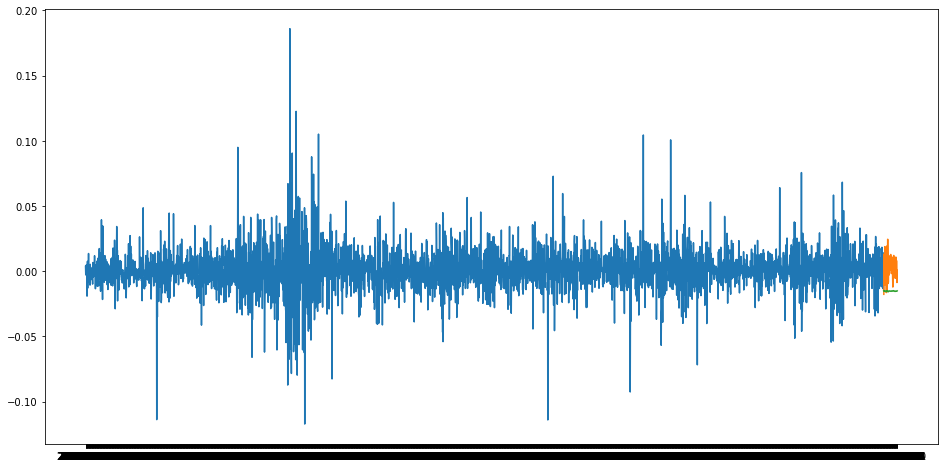

In [75]:
#for plotting
plt.figure(figsize=(16,8))
train = new_data[:3711]
valid = new_data[3711:]
valid['MSFT1'] = closing_price
plt.plot(train['MSFT'])
plt.plot(valid[['MSFT','MSFT1']])

In [76]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(valid['MSFT'],valid['MSFT1'])
rmse = sqrt(mse)

In [77]:
rmse


0.019510721321017607